### 正态方程

$$\hat{\theta}= \left ( X^{T}\cdot X \right )^{-1}\cdot X^{T}\cdot y$$

多项式方程公式解可由正态方程求出 $$X{_{0}}==1$$

In [1]:
import numpy as np
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
import matplotlib.pyplot as plt

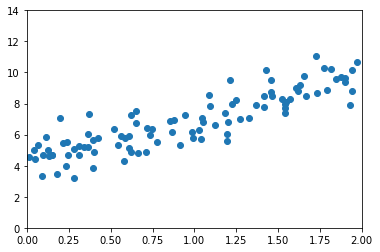

In [3]:
plt.xlim(0,2)
plt.ylim(0,14)
plt.plot(X,y,'o')

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

现在使用theta_best来进行预测

In [6]:
X_new = np.array([[0],[1],[2]])
X_new_b = np.c_[np.ones((3,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [6.98520954],
       [9.75532293]])

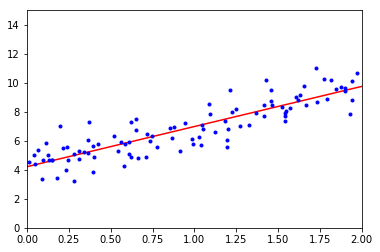

In [7]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)
#与以上达到相同效果

array([[4.21509616],
       [6.98520954],
       [9.75532293]])

In [10]:
eta = 0.1 #学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #随机初始值

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

通过画图感觉学习率对参数迭代的影响

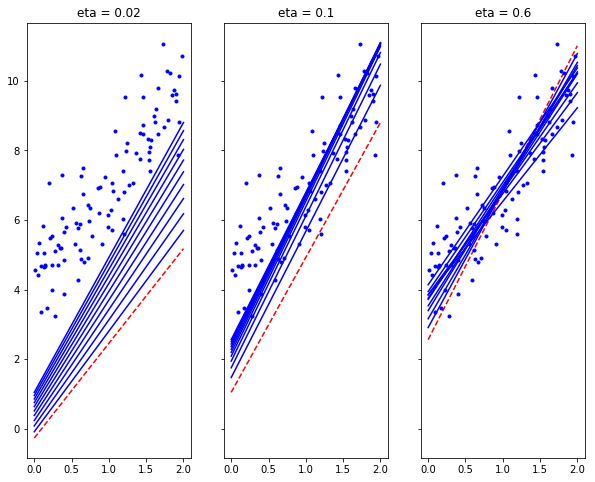

In [12]:
eta = [0.02,0.1,0.6] #学习率
n_iterations = 10
m = 100

theta = np.random.randn(2,1) #随机初始值

fig,axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(10,8))

for i in range(3):
       
    y_predict = X_new_b.dot(theta)
    #print(i)
    axes[i].plot(X_new,y_predict,"r--")
    axes[i].set_title('eta = '+str(eta[i]))
    axes[i].plot(X,y,"b.")

    for iteration in range(n_iterations):
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta[i]*gradients
        y_predict = X_new_b.dot(theta)
        axes[i].plot(X_new,y_predict,"b-")
    
    

批量梯度下降的缺点在于在大规模数据集上的运算时间很慢 在通过网格搜索选取合适的学习率 再通过合适的迭代次数选取最优的参数解  但在迭代次数上你尝尝会很头疼 迭代次数少欠拟合 次数多过拟合 一个可行的方法是：
### 当梯度向量小鱼一个值（容差）时，停止迭代，此时可以认为梯度下降几乎已经达到最小值

随机梯度下降缺点在于虽然具有随机性可以跳过局部最小值 但却很难达到最小值 一个解决办法是：
### 在使用随机梯度下降时 构造一个变化先快后慢的学习率是十分必要的

# Stochastic Gradient Descent

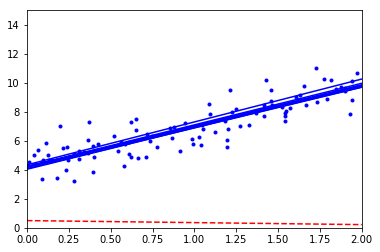

In [13]:
n_epochs = 10
t0,t1 = 5,50 #learning_schedule的超参数
np.random.seed(42)

theta_sgd = []

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

y_predict = X_new_b.dot(theta)

plt.plot(X_new,y_predict,"r--")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        theta_sgd.append(theta)
    plt.plot(X_new,y_predict,"b-")


# Batch Gradient Descent

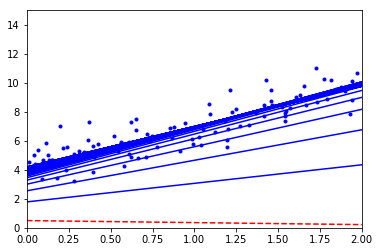

In [14]:
n_epochs = 100
eta = 0.1
m = 100
np.random.seed(42)

theta_bgd = []

theta = np.random.randn(2,1)

y_predict = X_new_b.dot(theta)

plt.plot(X_new,y_predict,"r--")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])


for epoch in range(n_epochs):
    xi = X_b
    yi = y
    gradients = 2/m * xi.T.dot(xi.dot(theta)-yi)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    theta_bgd.append(theta)
    plt.plot(X_new,y_predict,"b-")

# Mini-Batch Gradient Descent

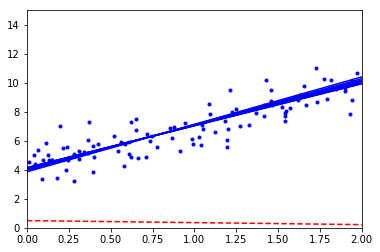

In [15]:
n_epochs = 10
t0,t1 = 5,500 #learning_schedule的超参数
minBatchSize = 20
np.random.seed(42)

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

y_predict = X_new_b.dot(theta)

plt.plot(X_new,y_predict,"r--")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

theta_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minBatchSize):
        xi = X_b[i:i+minBatchSize]
        yi = y[i:i+minBatchSize]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        theta_mgd.append(theta)
    plt.plot(X_new,y_predict,"b-")

In [16]:
theta_path_bgd = np.array(theta_bgd)
theta_path_sgd = np.array(theta_sgd)
theta_path_mgd = np.array(theta_mgd)

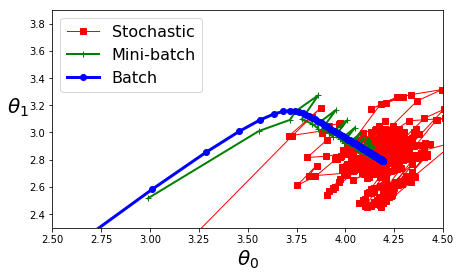

In [17]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [18]:
y_test = np.array(y)
y_test.shape

(100, 1)

In [19]:
y.shape
y_test = y.ravel()
y_test.shape

(100,)

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

d:\learn\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21565646]), array([2.77126331]))

In [22]:
m = 100
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

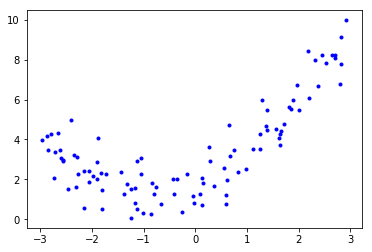

In [23]:
plt.plot(X,y,"b.")

使用 Scikit-Learning的
# PolynomialFeatures 
类进行训练数据集的转换，让训练集中每个特征的平方（2 次多项式）作为新特征（在这种情况下，仅存在一个特征）

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

PolynomialFeatures(degree=d) 把一个包含 个特征的数组转换为一个包含 
$$ \frac{\left ( n+d \right )!}{d!n!} $$
特征的数组。
### 小心大量特征的组合爆炸！

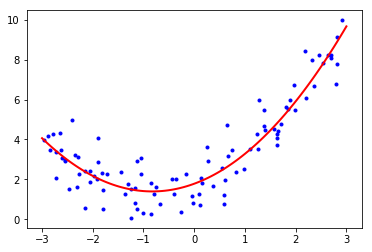

In [25]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

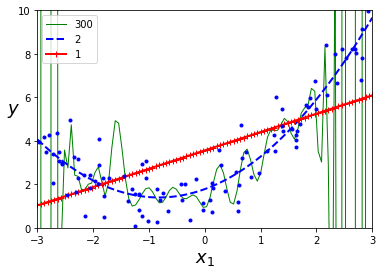

In [27]:
for style,width,degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    poly_features = PolynomialFeatures(degree,include_bias=False)
    lin_reg = LinearRegression()
    Scaler = StandardScaler()
    poly_features_Pipline = Pipeline([
        ("poly_features",poly_features),
        ("Scaler",Scaler),
        ("lin_reg",lin_reg)
    ])
    poly_features_Pipline.fit(X,y)
    y_predict = poly_features_Pipline.predict(X_new)
    plt.plot(X_new, y_predict, style, linewidth=width, label=str(degree))
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

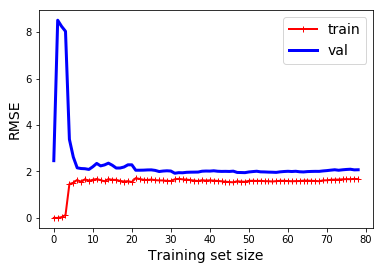

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

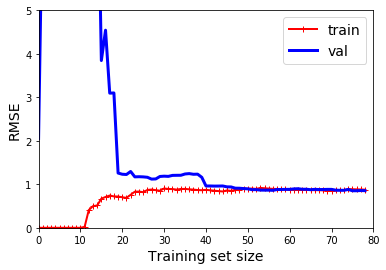

In [30]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

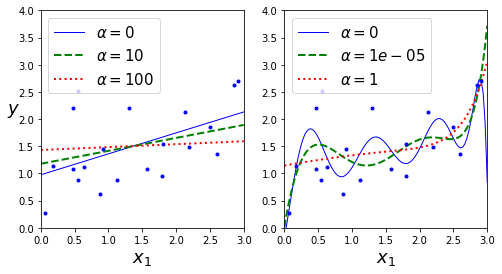

In [34]:
from sklearn.linear_model import Ridge


m = 20
np.random.seed(42)
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha,**model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10,include_bias=True)),
                ("Scl",StandardScaler()),
                ("model",model)
            ])
        model.fit(X,y)
        y_predict = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_predict, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
        
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()       

#### 这里将Ridge类名当做参数传入方法中    为$\theta$的L2范数
#### 在图例中使用format进行字符串格式化（可以使用列表及字典）
#### $\alpha$增大的过程，是平均值增多，极端值减小的过程，会使模型曲线变得扁平

d:\learn\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


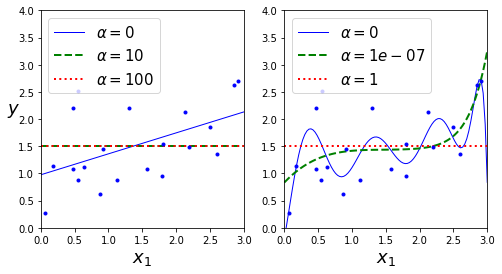

In [37]:
from sklearn.linear_model import Lasso

  
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()   

#### 这里将Lasso类名当做参数传入方法中    为$\theta$的L1范数
#### Lasso 回归的一个重要特征是它倾向于完全消除最不重要的特征的权重
#### Lasso回归自动的进行特征选择同时输出一个稀疏模型（即，具有很少的非零权重）

#### 弹性网络（ElasticNet）介于Ridge与Lasso之间通过一个参数r进行控制

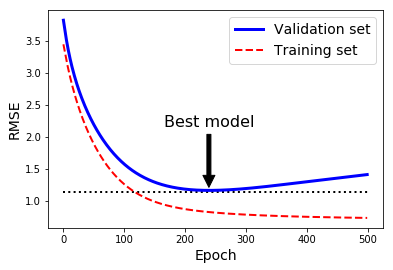

In [39]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

# 决策边界

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'feature_names', 'target', 'filename', 'data', 'target_names']

In [51]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

d:\learn\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

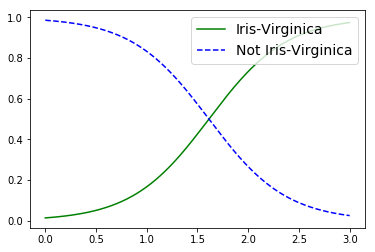

In [55]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="upper right", fontsize=14)

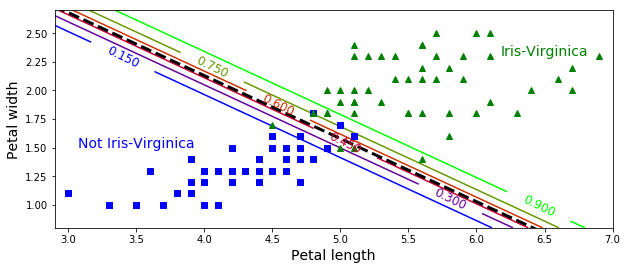

In [59]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

In [60]:
log_reg.coef_

array([[ 5.75286199, 10.44454566]])

In [61]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

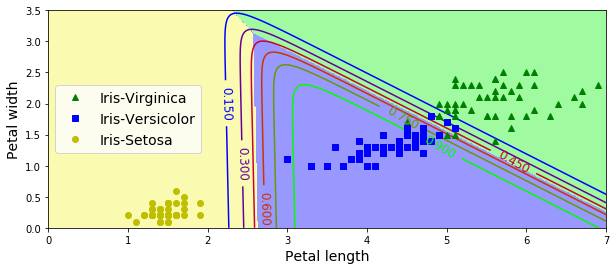

In [63]:
x0, x1 = np.meshgrid(#生成网格点的坐标矩阵
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)#背景颜色
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)#等高线
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()